# Simple Linear Regression

- Usada para prever uma quantidade $Y$ com base em uma única feature $X$
- Pressupõe que exista uma relação aproximadamente linear entre $X$ e $Y$
- Essa relação é escrita matematicamente na forma: $$Y \approx \beta _{0} + \beta _{1} \cdot X \; (3.1)$$
- Onde:
    - $Y$: target que queremos prever
    - $\approx$: "is approximately modeled as"
    - Coeficientes ou parâmetros:
        - $\beta _{0}$: intercept - valor que a quantidade assume quando X é igual a zero
        - $\beta _{1}$: slope - descreve a direção e a inclinação da reta
    - $X$: feature
<br><br>
Vamos rodar um código para ver como diferentes valores de $\beta _{0}$ e $\beta _{1}$ afetam uma "linha"

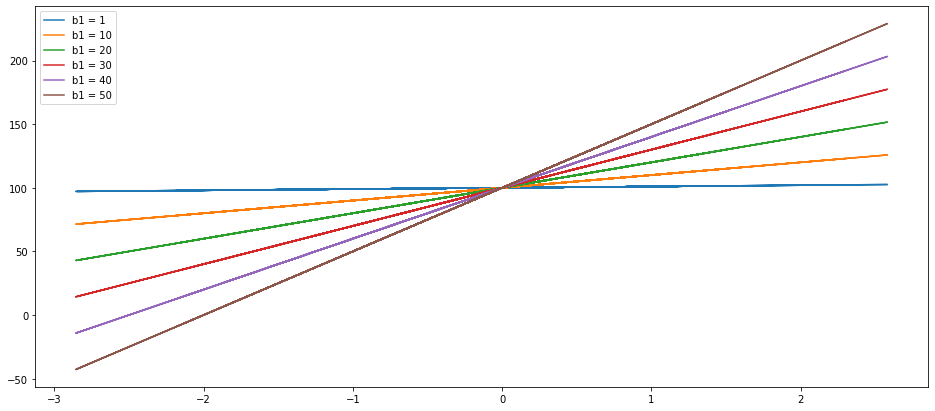

In [23]:
"""
Pedaço de célula onde:

    - Função linha: definimos uma função que calcula os valores y correspondentes para cada x em um np.ndarray. Aqui
    usamos a equação de uma reta
    
    - x: criamos um vetor (np.ndarray) com valores aleatórios de x. Sinta-se livre para "cutucar" esse parâmetro e ir
    vendo o que acontece com os gráficos, lembre-se que a intuição é muito importante para sabermos o que está acontecendo
    
    - b0 e b1: coeficientes dados pelo usuário. Sinta-se livre para mexer e ver como valores diferentes afetam os
    resultados da retas
    
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def linha(x:np.ndarray, b0:float, b1:float) -> np.ndarray:
    """
    Função que calcula os valores de y de uma reta, baseado nos coeficientes 
    b0 e b1, que são dados
    
    Parameter
    ----------
    x (numpy.ndarray):  com os valores de x
    b0 (float): intercept da reta, que é dado pelo usuário
    b1 (float): slope da reta, que é dado pelo usuário
    
    Return
    ----------
    y (numpy.ndarray): vetor com os valores correspondentes de cada x
    """
    y = b0 + b1*x
    return y


# vetor com 100 de valores de x sampleados de uma distribuição normal
x = np.random.randn(100)

# vamos fixar um b0 e rodar 6 valores diferentes de b1
b0 = 100
b1 = [1, 10, 20, 30, 40, 50]

# pegando valores de y e plotando para visualizarmos
plt.figure(figsize=(16, 7))
for slope in b1: # para cada valor de slope em b1, vamos fazer algo
    y = linha(x, b0, slope) # calculando os valores correspondentes de y
    label = 'b1 = ' + str(slope) 
    plt.plot(x, y, label=label)
    plt.legend()
plt.show()

## Vida Real

- Vemos o que acontece com retas para valores diferentes de $\beta _{0}$ e $\beta _{1}$. O que acontece na prática é que nós não sabemos quais os valores desses dois coeficientes/parâmetros, então temos que fazer uma ESTIMATIVA de ambos. Para isso, baseamo-nos nos dados históricos que possuímos.<br><br>

- Uma vez que temos esses coeficientes estimados, podemos usar a "continha" que eles nos dão para fazermos previsões para valores de X que nunca vimos.<br><br>

- A notação da relação entre $X$ e $Y$, quando temos valores estimados nos dados históricos, fica assim:
$$\hat{y} = \hat{\beta _{0}} + \hat{\beta _{1}} \cdot x$$

- Onde:
    - $\hat{y}$: previsão de $Y$ baseado no valor de $X = x$
    - $\hat{\beta _{0}}$ e $\hat{\beta _{1}}$: valores estimados para os coeficientes desconhecidos 

## Como estimar esses coeficientes? 

- Objetivo:
    - obter coeficientes $\hat{\beta _{0}}$ e $\hat{\beta _{1}}$ de modo que o modelo linear $(3.1)$ fits(ajuste/encaixe) "bem" nos dados
    - ou seja, queremos valores estimados de $\hat{\beta _{0}}$ e $\hat{\beta _{1}}$ que resultem em uma linha que seja o mais próxima possível dos pontos $X$ dados<br><br>
    
- Vamos plotar os dados do Boston Housing com a feature RM e o target MEDV. Vamos plotar algumas linhas para termos uma noção do que está acontecendo

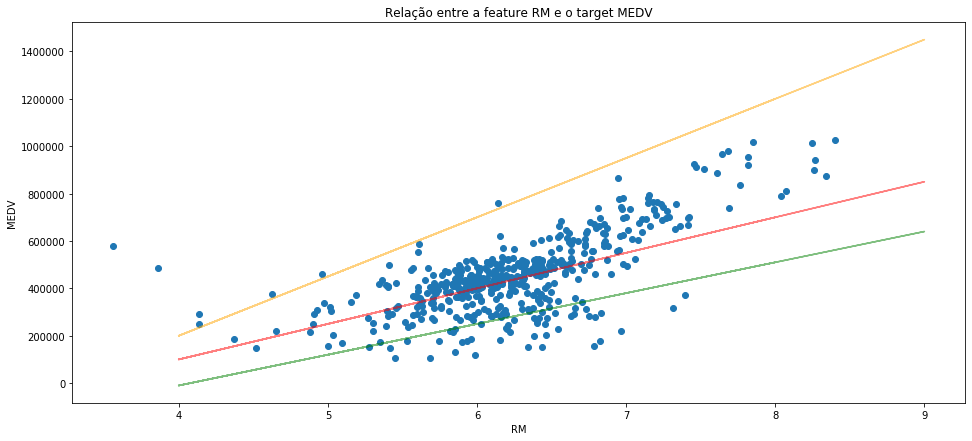

In [85]:
"""
Pedaço de célula onde:

    - Função linha: definimos uma função que calcula os valores y correspondentes para cada x em um np.ndarray. Aqui
    usamos a equação de uma reta
    
    - Leitura de arquivos com a função pd.read_csv, que é controlada por dois parâmetros:
        - PATH_FILE: caminho onde se encontra o arquivo
        - USE_COLS: colunas que iremos ler do arquivo
    
    - Criação de vetores de features e targets:
        - x: vetor de valores inteiros aleatórios
        - y: y calculado através da função linha, aqui usamos valores diferentes de b0 e b1 para mostrar como eles afetam
                a criação de uma reta
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def linha(x:np.ndarray, b0:float, b1:float) -> np.ndarray:
    """
    Função que calcula os valores de y de uma reta, baseado nos coeficientes 
    b0 e b1, que são dados
    
    Parameter
    ----------
    x (numpy.ndarray):  com os valores de x
    b0 (float): intercept da reta, que é dado pelo usuário
    b1 (float): slope da reta, que é dado pelo usuário
    
    Return
    ----------
    y (numpy.ndarray): vetor com os valores correspondentes de cada x
    """
    y = b0 + b1*x
    return y


PATH_FILE = 'data/housing.csv'
USE_COLS = ['RM', 'MEDV']

# leitura dos dados
df_housing = pd.read_csv(PATH_FILE, usecols=USE_COLS)

# criando vetor de x aleatórios
x = np.random.randint(4, 10, 10)

y_1 = linha(x, -500_000, 150_000)
y_2 = linha(x, -530_000, 130_000)
y_3 = linha(x, -800_000, 250_000)

# visualizando
plt.figure(figsize=(16, 7))
plt.scatter(df_housing.RM, df_housing.MEDV)
plt.plot(x, y_1, color='red', alpha=0.5)
plt.plot(x, y_2, color='green', alpha=0.5)
plt.plot(x, y_3, color='orange', alpha=0.5)
plt.xlabel(df_housing.RM.name)
plt.ylabel(df_housing.MEDV.name)
plt.title('Relação entre a feature RM e o target MEDV')
plt.show()

- Veja que podemos ir chutando valores de $\hat{\beta _{0}}$ e $\hat{\beta _{1}}$, e ir tendo uma noção intuitiva do que acontece, mas não temos certeza de qual delas é a melhor ou mais próxima possível dos pontos. Aliás:

- O que é melhor? Como medir o "mais próximo possível"?
    - o método mais comum de se fazer isso é minimizando o "___least squares criterion___"(critério dos mínimos quadrados)
    - vamos para algumas definições:
        - $\hat{y} = \hat{\beta _{0}} + \hat{\beta _{1}} \cdot x_{i}$: previsão de $Y$ para o ${i}$-ésimo valor de $X$
        - $e_{i} = y_{i} - \hat{y}_{i}$: representa o $i$-ésimo resíduo, ou seja, a diferença entre o valor real $y$ e o valor previsto $\hat{y}$
        - $RSS = e^{2}_{1} + e^{2}_{2} + e^{2}_{3} + \cdots + e^{2}_{n}$: Residual Sum of Squares, ou seja, a soma de todos os resíduos<br><br>
        
O método $least \; squares$ acha $\hat{\beta _{0}}$ e $\hat{\beta _{1}}$ que minimizam $RSS$. Felizmente, através do cálculo nós conseguimos obter uma fórmula fechada que nos dá essa reta. Veja abaixo:

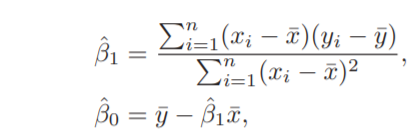

## Simple Linear Regression na Prática
### Com Scikit-Learn

RMSE dados teste: 115595.9501
b0 = -642884.4934
b1 = 176526.2859


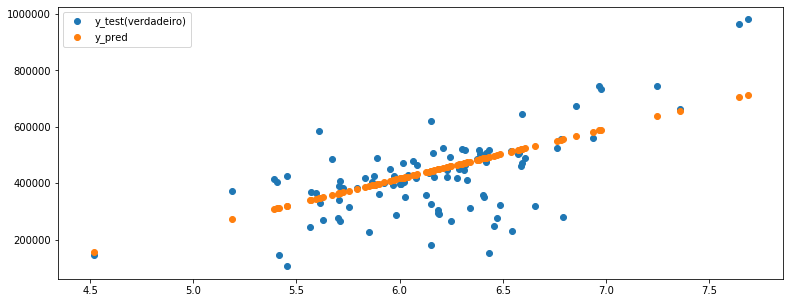

In [113]:
"""
"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# constantes
PATH_FILE = 'data/housing.csv'
USE_COLS = ['RM', 'MEDV']
TEST_SIZE = 0.2
RANDOM_SEED = 42
FIGSIZE = (13, 5)

# leitura dos dados
df_housing = pd.read_csv(PATH_FILE, usecols=USE_COLS)

# separando entre features e target
X = df_housing.drop(columns='MEDV')
y = df_housing.loc[:, 'MEDV']

# separando entre dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

# intanciando e treinando o modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# prevendo e avaliando
y_pred = lin_reg.predict(X_test)
print(f'RMSE dados teste: {mean_squared_error(y_test, y_pred, squared=False):.4f}')
print(f'b0 = {lin_reg.intercept_:.4f}')
print(f'b1 = {lin_reg.coef_[0]:.4f}')

# visualização
plt.figure(figsize=FIGSIZE)
plt.scatter(X_test, y_test, label='y_test(verdadeiro)')
plt.scatter(X_test, y_pred, label='y_pred')
plt.legend()
plt.show()

### Somente com Pandas

RMSE dados de teste: 115595.9501


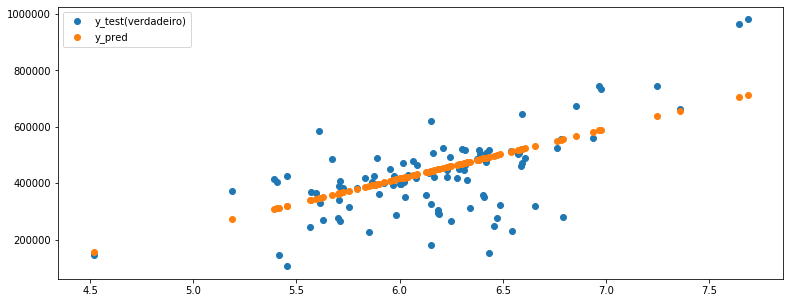

In [195]:
"""
"""
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# constantes
PATH_FILE = 'data/housing.csv'
USE_COLS = ['RM', 'MEDV']
TEST_SIZE = 0.2
RANDOM_SEED = 42
FIGSIZE = (13, 5)

# leitura dos dados
df_housing = pd.read_csv(PATH_FILE, usecols=USE_COLS)

# separando entre dados de treino e teste
df_housing_test = df_housing.sample(frac=TEST_SIZE, random_state=RANDOM_SEED).sort_index()
df_housing_train = df_housing.drop(df_housing_test.index)

# separando entre features e target
X_train, y_train = df_housing_train.drop(columns='MEDV'), df_housing_train.loc[:, 'MEDV']
X_test, y_test = df_housing_test.drop(columns='MEDV'), df_housing_test.loc[:, 'MEDV']

# modelando na mão
media_x = X_train.mean()
media_y = y_train.mean()

diff_media_x = X_train - media_x # diferença de cada x e sua média
diff_media_y = y_train - media_y # diferença de cada y e sua média

sum_mult_diff_media = (diff_media_x.loc[:, 'RM'] * diff_media_y).sum()
sum_diff_squared_x = (diff_media_x ** 2).sum()

b1 = sum_mult_diff_media / sum_diff_squared_x
b0 = media_y - (b1*media_x)

# fazendo previsões com os resultados
df_pred = b0 + (b1*X_test.copy())
df_pred = df_pred.rename(columns={'RM': 'y_pred'})
df_pred.loc[:, 'y_test'] = y_test

# mean_squared_error
print(f'RMSE dados de teste: {mean_squared_error(y_test, df_pred.y_pred, squared=False):.4f}')

# visualização
plt.figure(figsize=FIGSIZE)
plt.scatter(X_test, y_test, label='y_test(verdadeiro)')
plt.scatter(X_test, df_pred.y_pred, label='y_pred')
plt.legend()
plt.show()